**Gregg Maloy   
Data 602   
Assignment 7**

**INTRODUCTION**   
Maternal mortality rates have been on the increase in all racial/ethnic groups in the United States (1).  Health systems throughout the country are tasked with rectifying this problem.  The 'Pregnancy-Associated Mortality' dataset from 'NYC Open Data' was choosed to confirm that increased maternal mortality rates exists within the New York City Area (2).  The dataset separates deaths as 'preganancy-related' and 'preganancy-associated'.  This analysis is only interested in 'pregnancy-related' deaths, althought broader definitions of maternal mortality can include 'preganancy-associated' deaths.  

1. NPR article: https://www.npr.org/sections/health-shots/2023/07/04/1185904749/u-s-maternal-deaths-keep-rising-heres-who-is-most-at-risk 
2. Dataset: https://data.cityofnewyork.us/Health/Pregnancy-Associated-Mortality/27x4-cbi6

**LOADING DATA & EXPLORATION**    
The data set is accessed from 'NYC Open Data' via API.

In [273]:
import pandas as pd
# Read data from API 
url = 'https://data.cityofnewyork.us/resource/27x4-cbi6.json'
df = pd.read_json(url)

NOTES

Info(), describe(), isnull(), isna() and isnumeric() are utilized below to explore the dataset.    
Below are the key takeaways:  

df.info()
- There are 198 rows.
- There are six variables: year, related, underlying_cause, race_ethnicity, borough, deaths.
- 'Year' refers to year of death and is coded as an integer.
- 'Related' is a categorical variable with the values 'All', 'Pregnancy-associated but not related','Pregnancy-related,'Pregnancy-Related'(capital R),'Unable to Determine'. 'Pregnancy related' refers to a death that was directly related to pregncancy, while 'Pregnancy-associated but not related' is a death not directly related to pregnancy. This variable is coded as an object.
- 'Underlying_cause' is a categorical variable which captures causes of death which may or may not be related to the pregnancy, including 'Cancer', 'Homocide', 'Cardiovascular Conditions'. This variable is coded as an object.  
- 'Race_ethnicity' is a categorical variable referring to race/ethnicity of mother, with values 'Black non-Latina','White non-Latina', 'Latina,'Asian,'Other'. This variable is coded as an object.   
- 'Borough' is a categorical variable referring to borough of residence with values incuding 'Bronx', 'Brooklyn','Manhatten','Staten Island', 'Queens','Rest of State'. This variable is coded as an object.
- 'Deaths' refers to the number of deaths. Coded as an integer.   

df.describe()
- There are 5 years of data spanning from 2016-2020.    
- Due to the long nature of the dataset, the summary statistics produced by describe() are not accurate.

isnull() and isnan()
- There are no missing and invalid values.

isnumeric()
- Numeric values are the only datatype present in 'year' and 'deaths' columns.


In [274]:
#There are 6 columns: 2 integers and 4 are object.
#There are a total of 198 rows (df.shape could have been also used to determine this)
#The data types are appropriately coded for data

#Requirement Satisfied:
#Look at the structure of your data – are any variables improperly coded? Such as strings or characters? Convert to correct 
#structure if needed.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              198 non-null    int64 
 1   related           198 non-null    object
 2   underlying_cause  198 non-null    object
 3   race_ethnicity    198 non-null    object
 4   borough           198 non-null    object
 5   deaths            198 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 9.4+ KB


In [275]:
#There are 5 years of data spanning from 2016-2020
#The rest of these summary statitsics are not necessarily accurate due to the underlying structure of the data.
df.describe()

,year,deaths
count,198.000000,198.00000
mean,2018.055556,4.80303
std,1.371184,4.72133
min,2016.000000,0.00000
25%,2017.000000,1.00000
50%,2018.000000,3.00000
75%,2019.000000,6.00000
max,2020.000000,26.00000


In [276]:
#Requirement
#Fix missing and invalid values in data?  No as demonstrated by using isnull() and isna() below:
null_counts = df.isnull().sum()
print(null_counts)

year                0
related             0
underlying_cause    0
race_ethnicity      0
borough             0
deaths              0
dtype: int64


In [277]:
#Requirement
#Fix missing and invalid values in data?  No as demonstrated by using isnull() and isna() below:
nan_counts = df.isna().sum()
print(nan_counts)

year                0
related             0
underlying_cause    0
race_ethnicity      0
borough             0
deaths              0
dtype: int64


In [278]:
#Requirement:Check whether numeric values are present in a given column of your dataframe.
is_numeric_deaths = all(str(value).isnumeric() for value in df['deaths'])
is_numeric_year = all(str(value).isnumeric() for value in df['year'])


is_numeric_deaths
is_numeric_year

True

**MORE DATA EXPLORATION**   
Below the dataset was filtered by year for visual inspection.  After inspection it becomes clear the data is nuanced. The observation values appear to be aggregated in a manner in which the variables cannot be attributed to each other.  In other words, it is possible that two different rows in the dataset can capture the same death.  As such, summary statistics (ie max, mean, min) calculated using this dataset as is, are unreliable.  The data needs to be wrangled before any summary statistics (ie max, mean, min) can be calulcated.

In [279]:
#Inspecting a subset of rows by filtering the 'year' variable to '2019', it becomes clear the data is a little nuanced.
#The reader is left wodering what 'All' refers to, as it is not explained in the data dictionary 
#The observation values appear to be aggregated in a manner in which the variables cannot be attributed to each other.
filtered_df = df[df["year"] == 2019]
filtered_df

,year,related,underlying_cause,race_ethnicity,borough,deaths
116,2019,All,All,All,Bronx,12
117,2019,All,All,All,Brooklyn,20
118,2019,All,All,All,Manhattan,6
119,2019,All,All,All,Queens,12
120,2019,All,All,All,Staten Island,4
121,2019,All,All,All,Rest of State,3
122,2019,All,All,White non-Latina,All,11
123,2019,All,All,Latina,All,20
124,2019,All,All,Black non-Latina,All,26
125,2019,Pregnancy-associated but not related,Cancer,All,All,4


**MORE DATA EXPLORATION AND TRYING TO MAKE SENSE OF THE UNDERLYING DATA STRUCTURE**    
Below the data is filtered at various levels in an attempt to make sense of the underlying dataset structure.  By applying a combination of filters, it was determined that long structure of the data did, in fact, cause deaths to duplicate across rows.  This is demonstrated below by filtering to the 'year' to value '2019' as well as filtering to 'pregnancy-related' for 'race_ethnicity','borough' and 'deaths' variables respectively.  By filtering to 'race_ethnicity','borough' and 'deaths' separately and aggregating the deaths, the total number of deaths for each group came to 28 respectively.  This means each variable captures all deaths and that a combination of variables cannot be used to subsection the data, else the deaths would be duplicated.

In [280]:
#The observation values appear to be aggregated in a manner in which the variables cannot be attributed to each other.
#For instance 'race_ethnicity' observations were recorded/aggregated separately than 'borough' observations, making an analysis 
#race/ethnicity by borough impossible.
#To confirm this below some of the observation categories for the year 2019 are totaled and equal the same number.
#As such any summary statistics regarding min, max and mean are not reliable as the number of deaths are duplicated due to the 
#organization of the underlying data 
filtered_df_3 = df[(df['related'] == 'Pregnancy-related') & (df['borough'] != 'All')& (df['year']==2019)]                    
sum_by_related_and_borough_2019 = filtered_df_3['deaths'].sum()
print(sum_by_related_and_borough_2019)

filtered_df_4 = df[(df['related'] == 'Pregnancy-related') & (df['race_ethnicity'] != 'All')& (df['year']==2019)]
sum_by_related_and_Race_eth_2019 = filtered_df_4['deaths'].sum()
print(sum_by_related_and_Race_eth_2019)

filtered_df_5 = df[(df['related'] == 'Pregnancy-Related') & (df['underlying_cause'] != 'All') & (df['year']==2019)]
sum_by_related_and_underlying_cause_2019 = filtered_df_5['deaths'].sum()
print(sum_by_related_and_underlying_cause_2019)

28
28
28


**DENOMINATOR DATAFRAME AND EVEN MORE EXPLORATION**     
As this is only a preliminary/superficial analysis, we will limit the dataset to 'preganancy-related' deaths. 
The final denominator dataframe will include columns 'year','related','race_ethnicity' and 'deaths'. Limiting the dataframe to include only 'pregnancy-related' will solve the 'duplicate death' problem and allow us to calculate summary statistics for this subset.

Some highleve takeaways:
- Total number of pregnancy related deaths for the five years is 114 deaths.
- 'Black non-Latina' and 'Latina' groups consistently have higher annual mortality numbers when compared to 'Asian' and 'White non-Latina'.
- The years with the highest number of deaths per race_ethnicity are 2020 for 'Asian/Pacific Islander', 2020 and 2019 for 'Latina', '2019' for 'White non-Latina' and finally 2019 and 2018 for'Black non-Latina'. 

In [281]:
#Requirements:   
#1. Create a subset of your original data and perform the following.    
#2. Filter your data based on some condition.

#This is our denominator dataframe
df_pr = df.loc[(df['related'] == 'Pregnancy-related') & (df['race_ethnicity'] != 'All'), ['year', 'related', 'race_ethnicity', 'deaths']]
print(df_pr)

     year            related          race_ethnicity  deaths
22   2016  Pregnancy-related        White non-Latina       1
23   2016  Pregnancy-related                  Latina       6
24   2016  Pregnancy-related        Black non-Latina       6
25   2016  Pregnancy-related  Asian/Pacific Islander       2
58   2017  Pregnancy-related        White non-Latina       1
59   2017  Pregnancy-related                   Other       1
60   2017  Pregnancy-related                  Latina       6
61   2017  Pregnancy-related        Black non-Latina      10
62   2017  Pregnancy-related  Asian/Pacific Islander       1
98   2018  Pregnancy-related        White non-Latina       5
99   2018  Pregnancy-related                  Latina       2
100  2018  Pregnancy-related        Black non-Latina      13
101  2018  Pregnancy-related  Asian/Pacific Islander       3
138  2019  Pregnancy-related        White non-Latina       6
139  2019  Pregnancy-related                  Latina       9
140  2019  Pregnancy-rel

In [282]:
#describe() provides number of total deaths in our df
df_pr.describe()
df_pr['deaths'].sum()

114

In [283]:
#let's use sort_by to sort the df by deaths and see if a pattern is appearant
#Intersting 'Black non-Latin' and 'Latina' consistently have higher annual mortality numbers
df_pr.sort_values('deaths',ascending=False)

,year,related,race_ethnicity,deaths
140,2019,Pregnancy-related,Black non-Latina,13
100,2018,Pregnancy-related,Black non-Latina,13
183,2020,Pregnancy-related,Black non-Latina,12
61,2017,Pregnancy-related,Black non-Latina,10
139,2019,Pregnancy-related,Latina,9
182,2020,Pregnancy-related,Latina,9
24,2016,Pregnancy-related,Black non-Latina,6
60,2017,Pregnancy-related,Latina,6
23,2016,Pregnancy-related,Latina,6
138,2019,Pregnancy-related,White non-Latina,6


In [285]:
#Requirements:
# 1. Group your dataset by one column, and get the mean, min, and max values by group.
# 2. Sort your data based on multiple variables.


#Let's see what year has the highest number of deaths per race_ethnicity'
df_pr.sort_values(['race_ethnicity','deaths'],ascending=[False, False])
# Group the DataFrame by 'race_ethnicity'
groups = df_pr.groupby('race_ethnicity')


# Initialize a new column 'rank' with the rank of 'deaths' within each group
df_pr['rank'] = groups['deaths'].rank(ascending=False, method='min')

df_pr_trial = df_pr[df_pr["rank"] == 1.0]


df_pr_trial.sort_values(['race_ethnicity','year'],ascending=False)

# Print the DataFrame
print(df_pr_trial)

     year            related          race_ethnicity  deaths  rank
59   2017  Pregnancy-related                   Other       1   1.0
100  2018  Pregnancy-related        Black non-Latina      13   1.0
138  2019  Pregnancy-related        White non-Latina       6   1.0
139  2019  Pregnancy-related                  Latina       9   1.0
140  2019  Pregnancy-related        Black non-Latina      13   1.0
182  2020  Pregnancy-related                  Latina       9   1.0
184  2020  Pregnancy-related  Asian/Pacific Islander       4   1.0


**...AND EVEN MORE EXPLORATION**  
Below additional summary statistics are also calculated, as well as a new variable created, 'percent', which displays the percent of deaths in each 'race_ethnicity'. Approximately 50% of the deaths are 'Black non-Latina' and approximately 30% are 'Latina'.

In [286]:
#Requirement:  
# 1. Group your dataset by one column, and get the mean, min, and max values by group.   
# 2. Create new columns based on existing columns or calculations.


#Let's use Group_by() to break deaths down by total deaths and then convert to percent
#intersting, ~50% of the deaths are 'Black non-Latina' and ~30% are Latina.
grouped = df_pr.groupby('race_ethnicity')
#percent
grouped = df_pr.groupby('race_ethnicity')
deaths_sum_by_race = grouped['deaths'].sum()
percentage_by_race = (deaths_sum_by_race / deaths_sum_by_race.sum()) * 100
percentage_by_race = percentage_by_race.rename('deaths')
percentage_sorted = percentage_by_race.sort_values(ascending=False)
print("Percentage:", percentage_sorted)   
 
#mean
mean= grouped.mean()
mean_sorted=mean.sort_values('deaths',ascending=False)
print("Mean",mean_sorted)   

#max
max= grouped.max()
max_sorted=max.sort_values('deaths',ascending=False)
print("Max",max_sorted)   

#min
min= grouped.min()
min_sort=min.sort_values('deaths',ascending=False)
print("Min",min_sort)

Percentage: race_ethnicity
Black non-Latina          47.368421
Latina                    28.070175
White non-Latina          14.912281
Asian/Pacific Islander     8.771930
Other                      0.877193
Name: deaths, dtype: float64
Mean                            year  deaths  rank
race_ethnicity                               
Black non-Latina        2018.00    10.8   2.8
Latina                  2018.00     6.4   2.6
White non-Latina        2018.00     3.4   2.8
Asian/Pacific Islander  2017.75     2.5   2.5
Other                   2017.00     1.0   1.0
Max                         year            related  deaths  rank
race_ethnicity                                               
Black non-Latina        2020  Pregnancy-related      13   5.0
Latina                  2020  Pregnancy-related       9   5.0
White non-Latina        2020  Pregnancy-related       6   4.0
Asian/Pacific Islander  2020  Pregnancy-related       4   4.0
Other                   2017  Pregnancy-related       1   1.0

C:\Users\maric\AppData\Local\Temp\ipykernel_6120\335910260.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean= grouped.mean()


**...AND MORE EXPLORATION (the last I promise)**      
Below yet more wrangling and cleaning is performed including: 
- Dropping a row from the dataset. 'Other' is dropped as there is only one record where 'race_ethnicity' is recorded as 'Other'.
- Column 'related' is dropped from the dataset as it is redundant.
- Converted all the string values to upper or lower cases in one column as it is an assignment requirement.

In [240]:
#Requirement:   
#Drop a row(s) from your dataset.

df_pr = df_pr.drop(59)
print(df_pr)

     year            related          race_ethnicity  deaths  rank
22   2016  Pregnancy-related        White non-Latina       1   4.0
23   2016  Pregnancy-related                  Latina       6   3.0
24   2016  Pregnancy-related        Black non-Latina       6   5.0
25   2016  Pregnancy-related  Asian/Pacific Islander       2   3.0
58   2017  Pregnancy-related        White non-Latina       1   4.0
60   2017  Pregnancy-related                  Latina       6   3.0
61   2017  Pregnancy-related        Black non-Latina      10   4.0
62   2017  Pregnancy-related  Asian/Pacific Islander       1   4.0
98   2018  Pregnancy-related        White non-Latina       5   2.0
99   2018  Pregnancy-related                  Latina       2   5.0
100  2018  Pregnancy-related        Black non-Latina      13   1.0
101  2018  Pregnancy-related  Asian/Pacific Islander       3   2.0
138  2019  Pregnancy-related        White non-Latina       6   1.0
139  2019  Pregnancy-related                  Latina       9  

In [241]:
#Requirement: 
#Drop column(s) from your dataset.

df_pr = df_pr.drop('related', axis=1)
print(df_pr)

     year          race_ethnicity  deaths  rank
22   2016        White non-Latina       1   4.0
23   2016                  Latina       6   3.0
24   2016        Black non-Latina       6   5.0
25   2016  Asian/Pacific Islander       2   3.0
58   2017        White non-Latina       1   4.0
60   2017                  Latina       6   3.0
61   2017        Black non-Latina      10   4.0
62   2017  Asian/Pacific Islander       1   4.0
98   2018        White non-Latina       5   2.0
99   2018                  Latina       2   5.0
100  2018        Black non-Latina      13   1.0
101  2018  Asian/Pacific Islander       3   2.0
138  2019        White non-Latina       6   1.0
139  2019                  Latina       9   1.0
140  2019        Black non-Latina      13   1.0
181  2020        White non-Latina       4   3.0
182  2020                  Latina       9   1.0
183  2020        Black non-Latina      12   3.0
184  2020  Asian/Pacific Islander       4   1.0


In [242]:
#Requirement:
#Convert all the string values to upper or lower cases in one column

df_pr['race_ethnicity'] = df_pr['race_ethnicity'].str.upper()
print(df_pr)
df_pr['race_ethnicity'] = df_pr['race_ethnicity'].str.lower()
print(df_pr)

     year          race_ethnicity  deaths  rank
22   2016        WHITE NON-LATINA       1   4.0
23   2016                  LATINA       6   3.0
24   2016        BLACK NON-LATINA       6   5.0
25   2016  ASIAN/PACIFIC ISLANDER       2   3.0
58   2017        WHITE NON-LATINA       1   4.0
60   2017                  LATINA       6   3.0
61   2017        BLACK NON-LATINA      10   4.0
62   2017  ASIAN/PACIFIC ISLANDER       1   4.0
98   2018        WHITE NON-LATINA       5   2.0
99   2018                  LATINA       2   5.0
100  2018        BLACK NON-LATINA      13   1.0
101  2018  ASIAN/PACIFIC ISLANDER       3   2.0
138  2019        WHITE NON-LATINA       6   1.0
139  2019                  LATINA       9   1.0
140  2019        BLACK NON-LATINA      13   1.0
181  2020        WHITE NON-LATINA       4   3.0
182  2020                  LATINA       9   1.0
183  2020        BLACK NON-LATINA      12   3.0
184  2020  ASIAN/PACIFIC ISLANDER       4   1.0
     year          race_ethnicity  death

**FINALLY, THE FINAL TABLE :)**   
Data is transformed to wide format to facilitate readability and a new variable created 'Percent Change 2016-2020' which calculates the percent change in mortality rate bertween the years 2016 and 2020 for each 'race_ethnicity' group.

In [313]:
#Requirement: Modify multiple column names.

wide_data = df_pr.pivot(index='year', columns='race_ethnicity', values='deaths').reset_index()

# Fill NaN values with 0
wide_data = wide_data.fillna(0)

# Rename the columns 
wide_data.columns.name = None  # Remove the columns' name
wide_data = wide_data.rename(columns={'black non-latina': 'black', 'latina': 'latina', 'white non-latina': 'white', 'asian/pacific islander': 'asian'})

# Pivot
wide_df = df_pr.pivot(index='race_ethnicity', columns='year', values='deaths')

# Sort columns in ascending order
wide_df = wide_df.sort_index(axis=1)

# Reset the index to keep 'race_ethnicity' as a column
wide_df = wide_df.reset_index()

# Fill missing values with 0
wide_df = wide_df.fillna(0)

#Rename the index column to None (to remove the name)
wide_df.index.name = None




wide_df['Percent Change 2016-2020'] = ((wide_df[2020] - wide_df[2016]) / wide_df[2016]) * 100

# Sort the DataFrame by percent change in descending order
wide_df = wide_df.sort_values(by='Percent Change 2016-2020', ascending=False)

print(wide_df)

year          race_ethnicity  2016  2017  2018  2019  2020  \
4           White non-Latina   1.0   1.0   5.0   6.0   4.0   
0     Asian/Pacific Islander   2.0   1.0   3.0   0.0   4.0   
1           Black non-Latina   6.0  10.0  13.0  13.0  12.0   
2                     Latina   6.0   6.0   2.0   9.0   9.0   
3                      Other   0.0   1.0   0.0   0.0   0.0   

year  Percent Change 2016-2020  
4                        300.0  
0                        100.0  
1                        100.0  
2                         50.0  
3                          NaN  


**Conclusion**

Pregnancy-related maternal mortality has increased for all 'race_ethnicity' groups in the NYC areas between years 2016-2020. Although 'Percent Change 2016-2020' may not be the best statistic to capture this increase, this was a superficial analysis and  the calculation coupled with the final table demonstrate year over year increase in pregnancy-related maternal mortality.  The data suggests that although the number of deaths in the original dataset is heavily skewed towards 'black non-latina' and 'latina', making up ~80% of deaths, 'white non-latina' was the group with the largest percent increase. Regardless, the number of deaths among each 'race_ethnicity' group is in line with national trends.

year          race_ethnicity  2016  2017  2018  2019  2020  \
4           White non-Latina   1.0   1.0   5.0   6.0   4.0   
0     Asian/Pacific Islander   2.0   1.0   3.0   0.0   4.0   
1           Black non-Latina   6.0  10.0  13.0  13.0  12.0   
2                     Latina   6.0   6.0   2.0   9.0   9.0   
3                      Other   0.0   1.0   0.0   0.0   0.0   

year  Percent Change 2016-2020  
4                        300.0  
0                        100.0  
1                        100.0  
2                         50.0  
3                          NaN  


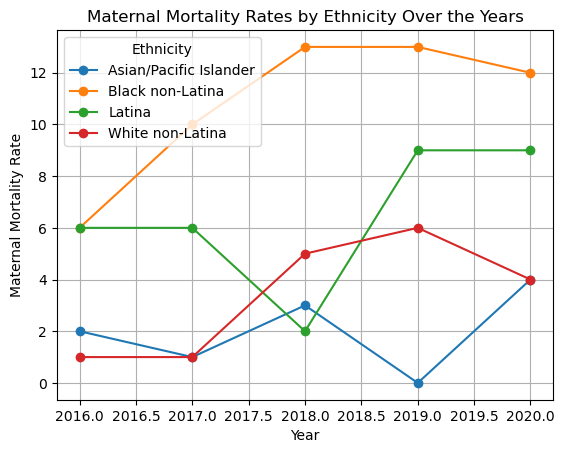

In [314]:
print(wide_df)

wide_data_1= wide_data.drop('Other', axis=1)

# Set the 'Year' column as the index
wide_data_1.set_index('year', inplace=True)

#line chart
wide_data_1.plot(kind='line', marker='o')
plt.title('Maternal Mortality Rates by Ethnicity Over the Years')
plt.xlabel('Year')
plt.ylabel('Maternal Mortality Rate')
plt.legend(title='Ethnicity')
plt.grid(True)

# Show the plot
plt.show()